<a href="https://colab.research.google.com/github/ellenrpaes/Data_Science_Projects/blob/master/Challenge_HR_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://github.com/ellenrpaes/Datasets_and_Images/blob/master/RH_v2.png?raw=true" height="180px"></p>

# **CHALLENGE DATA SCIENCE SCHOOL: TURNOVER REDUCTION AND TALENT RETENTION**

When we think about Data Science applications, we cannot be limited to professionals who study only mathematical techniques, data mining methodologies, or programming language, for example. These profiles are part of a much larger ecosystem that effectively will only have success and added value if you think together with business, in the application and solution of the real pains of the business.

We can think about Data Science in any process or company because the application of Data Science techniques is at our disposal to solve problems, whether from insight with simple exploratory analysis to applications of predictive modeling or more technical robust as an application of neural networks.

Therefore, the Human Resources area is a world of analytical opportunities, from the selection of the "ideal" candidate in External Recruitment & Selection, recommendation of internal vacancies for professional profiles more suitable for the opportunities, turnover analysis to understand possible gaps in retention talent and even a combination of analytical KPIs for managing processes in an integrated way, such as People Analytics.

In this project, the objective will be to make an exploratory analysis of the data made available by IBM in Kaggle, which aims not only to analyze the data but also to seek solutions to decrease Turnover and increase talent retention through a machine learning model.

Regardless of the company's activity, high turnover is not healthy, as it indicates a financial waste and operational failures that range from the initial process of choosing the employee during Recruitment & Selection to his journey and experience in the Company, going through development, training, and performance.



# Data Science for HR

We can observe numerous Data Science applications in the Human Resources area to help maximize results and performance. Starting with the **Recruitment & Selection** process, whether for internal or external vacancies, making the "ideal match" occur and the requirements of the vacancy are met, at least technically since behavioral aspects may require another type of assessment. 

After hiring, the **Development & Education** team can act in a system for recommending courses and platforms that are appropriate to the employee's profile, reinforcing the importance of continuous development, providing updated content, and maintaining the employee's evolution journey with the Company's growth journey.  

For the **Performance** team, we can address reduction or maintenance of adequate turnover levels that do not impact business continuity, issues that impact productivity, engagement, and talent retention, such as attrition levels among professionals, absenteeism, among others. 

All the examples mentioned, associated with other indicators, are included in a strategic view of Peoples' KPIs (People Analytics). In general, like any process, what is not measured is not improved so People Analytics aims to manage results, performance, talents, and process optimization to make data-driven decisions. This kind of management allows the Organization to has perennial growth, engagement, retention of talents, absenteeism reduction, among others. 

# Scope of this Project

The objective of this project is to analyze and seek solutions to decrease turnover and increase the retention of good professionals in companies. We will use data created and made available by IBM Data Scientists on [Kaggle]('https://kaggle.com/'). 

We will make an exploratory analysis of the data and build Machine Learning models to help us to predict possible attritions. With this, the HR team can create guidelines to increase the quality of life in the work environment, retain good professionals and minimize turnovers due to attrition.

In [36]:
# hide warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# installing scikit-plot
!pip install -q scikit-plot

In [37]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Data dictionary
A brief explanation of categorical variables:

<p align="center"><img src="https://github.com/ellenrpaes/Datasets_and_Images/blob/master/DicRH.png?raw=true" height="250px"></p>


# Initial exploration of the dataset

Here, the objective is to understand data structure and work on some processing on the variables so that the analyzes are not compromised.

In [38]:
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/ellenrpaes/Datasets_and_Images/master/datasets_1067_1925_WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Check first 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Using the code below, we can identify the size of our dataset, the number of existing columns, the type of data, and the amount of non-null data. It is possible to observe that we have in this dataset a set of 1,470 data entries with 35 variables (features) and zero missing data!

In [39]:
# Check dataset size
print("Informações Sobre o Dataset")
print("Features:\t {}".format(df.shape[1]))
print("Rows:\t {}\n".format(df.shape[0]))

# Check type of variables
display(df.info())

Informações Sobre o Dataset
Features:	 35
Rows:	 1470

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement         

None

As we have the age variable in the dataset, it would be interesting to create 3 new variables called `Age_Range()`, `YearsAtCompany_Range()` and `YearsWithCurrManager_Range()` to group some quick visualizations and analyzes by age group, company time, and length of stay with the same managers. Note that the variables have been added in the last columns of this table.

In [40]:
# Age Range
bins_age = [18, 30, 40, 50, 60] 
labels_age = ['18-30', '31-40', '41-49', '50+']
df["Age_Range"] = pd.cut(df.Age, bins_age, labels = labels_age,include_lowest = True).astype('object')

# Years At Company
bins_YearsAtCompany = [0, 1, 5, 10, 15, 20, 25, 30, 40] 
labels_YearsAtCompany = ['0-1','2-5', '6-10', '11-15', '16-19','20-25','26-39','30+']
df["YearsAtCompany_Range"] = pd.cut(df.YearsAtCompany, bins_YearsAtCompany, labels = labels_YearsAtCompany,include_lowest = True).astype('object')

# YearsWithCurrManager
bins_YearsWithCurrManager = [0, 1, 5, 10, 15, 20] 
labels_YearsWithCurrManager = ['0-1', '2-5', '6-10', '11-15', '15+']
df["YearsWithCurrManager_Range"] = pd.cut(df.YearsWithCurrManager, bins_YearsWithCurrManager, labels = labels_YearsWithCurrManager,include_lowest = True).astype('object')

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Range,YearsAtCompany_Range,YearsWithCurrManager_Range
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,41-49,6-10,2-5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,41-49,6-10,6-10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,31-40,0-1,0-1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,31-40,6-10,0-1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,18-30,2-5,2-5


Through code analysisdf.describe `df.describe(include='O')` it is possible to have an interesting initial analysis of the categorical data, such as the amount of existing data, the amount of unique categorization and what are the most frequent terms of these variables. Thus, we identified:

1. The Attrition variable has two categorizations and analyzing the first 5 lines of the previous code, it was possible to conclude that it is **Yes** and **No** and that Attrition equal to **No** represents 84% ​​of the data.
2.  **71%** of employees are graduated in Life Sciences. Initially, there is a concentration of people with this type of graduation.
3. **65%** of employees are part of the **Research & Development Department**.
4. **41%** of employees are graduated in Life Sciences. Initially, there is a concentration of people with this type of graduation.
5. **60%** of employees are **Male**.
6. **22%** of employees are Sales **Sales Executive**. There are also 8 other types of positions.
7. **46%** of employees are married.
8. All employees are over 18 years old.
9. **72%** of employees do not have an **OverTime**.
10. **42%** of employees are in the 31-40 age group.
11. **38%** of employees have between 2 to 5 years in the company.
12. **42%** of employees have between 2 to 5 years of work with the same manager.


In [41]:
# Statistical summary of categorical variables
df.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age_Range,YearsAtCompany_Range,YearsWithCurrManager_Range
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2,4,8,5
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,31-40,2-5,2-5
freq,1233,1043,961,606,882,326,673,1470,1054,619,561,615


# **Exploratory Analysis of the population of this Company**

We can do a quick scan in the table below and note that:

* **42%o** f employees are in the 31-40 age group. 

*If you want to check the code that created the table, click on the line below and select the 3 points at the end, and in the Form option, choose the option Show Code.*

In [42]:
#@title Table | The frequency of the population distributed by Gender x Age group
# Definition of a segmented dataframe to know the age group of employees
df_pyramid = pd.DataFrame(df, columns = ['Gender','Age_Range','EmployeeCount'])
# Create a grouping of the number of employees by Gender and Age Group
df_pyramid_1 = df_pyramid.groupby(by=['Gender','Age_Range'])['EmployeeCount'].sum().reset_index()
# Pivot the table to transform the gender variable into two variables segmented by gender
df_pyramid_2 = pd.pivot_table(df_pyramid_1, values='EmployeeCount', index=['Age_Range'] ,columns='Gender', aggfunc= 'sum', fill_value = 0).reset_index()
# Create a "Total" variable to find out the number of employees in each age group, regardless of gender.
df_pyramid_2["Total"] = df_pyramid_2["Female"] + df_pyramid_2["Male"] 
(print("Summary table - Age profile and Gender of the Company's General population"))
df_pyramid_2.head()

Summary table - Age profile and Gender of the Company's General population


Gender,Age_Range,Female,Male,Total
0,18-30,146,240,386
1,31-40,249,370,619
2,41-49,129,193,322
3,50+,64,79,143


Below, graphically we can see below the distribution of genders between age groups.

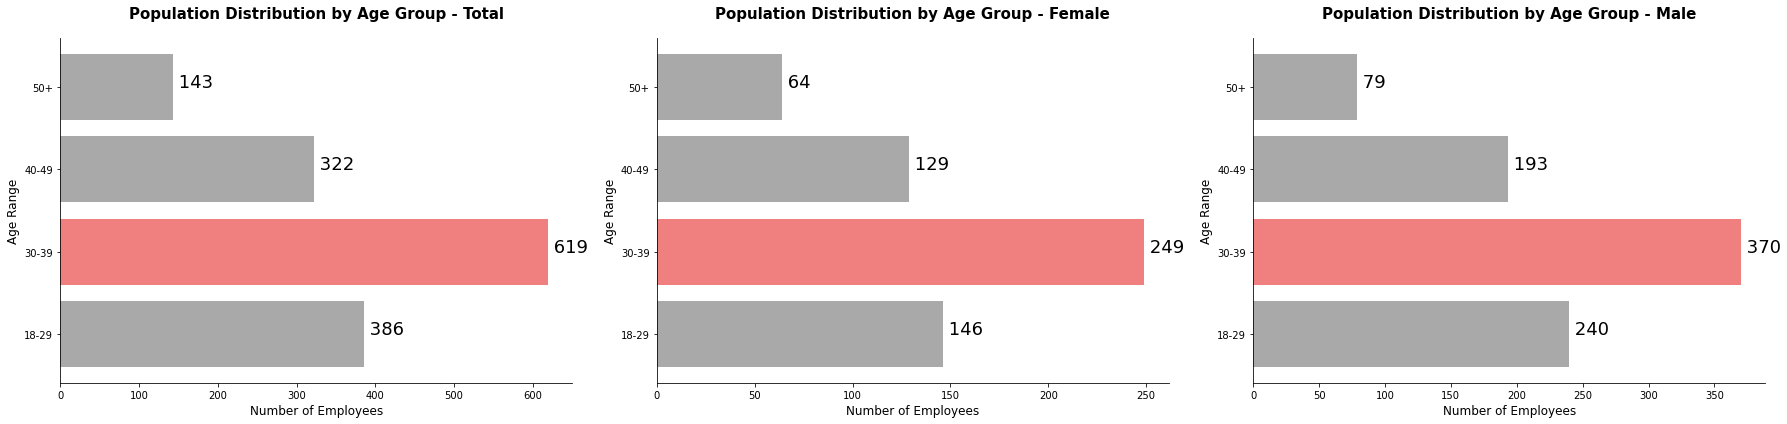

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

x1 = ['18-29','30-39','40-49','50+']
z1 = df_pyramid_2['Total']
ax1.set_title('Population Distribution by Age Group - Total', fontsize=15, fontweight='bold',pad=20)
ax1.set_xlabel('Number of Employees', fontsize=12)
ax1.set_ylabel('Age Range', fontsize=12)
clrs = ['darkgray' if (x < max(z1)) else 'lightcoral' for x in z1 ]
ax1.barh(x1, z1, color=clrs)
for i, v in enumerate(z1):
    ax1.text(v, i, " "+str(v), color='black', fontsize = 18)

x2 = ['18-29','30-39','40-49','50+']
z2 = df_pyramid_2['Female']
ax2.set_title('Population Distribution by Age Group - Female', fontsize=15, fontweight='bold',pad=20)
ax2.set_xlabel('Number of Employees', fontsize=12)
ax2.set_ylabel('Age Range', fontsize=12)
clrs = ['darkgray' if (x < max(z2)) else 'lightcoral' for x in z2 ]
ax2.barh(x2, z2, color=clrs)
for i, v in enumerate(z2):
    ax2.text(v, i, " "+str(v), color='black', fontsize = 18)

x3 = ['18-29','30-39','40-49','50+']
z3 = df_pyramid_2['Male']
ax3.set_title('Population Distribution by Age Group - Male', fontsize=15, fontweight='bold',pad=20)
ax3.set_xlabel('Number of Employees', fontsize=12)
ax3.set_ylabel('Age Range', fontsize=12)
clrs = ['darkgray' if (x < max(z3)) else 'lightcoral' for x in z3 ]
ax3.barh(x3, z3, color = clrs)
for i, v in enumerate(z3):
    ax3.text(v, i, " "+str(v), color='black', fontsize = 18)

sns.despine(fig)
plt.tight_layout()
plt.show()

We can make a quick exploration in the table below that contemplates the distribution view of those who had Attrition and observe that:

* **42%** of the employees are in the age group of 18-30 years. When we analyze within this age group we have, with **59%** of attritions for men and 41% women.

* In general, regardless of the range age, **63%** of the attrition happening to men and **37%** to women.

*If you want to check the code that created the table, click on the line below and select the 3 points at the end, and in the Form option, choose the option Show Code.*

In [44]:
#@title Table of the frequency of the population distributed by Gender x Age group | With Attrition
# Definition of a segmented dataframe to know the age group of employees With Attrition
df_yes = df.loc[df.Attrition == "Yes"].copy()
df_yes_ = pd.DataFrame(df_yes, columns = ['Gender','Age_Range','EmployeeCount'])
# Create a grouping of the number of employees by Gender and Age Group With Attrition
df_yes_1 = df_yes_.groupby(by=['Gender','Age_Range'])['EmployeeCount'].sum().reset_index()
# Pivot the table to transform the gender variable into two variables segmented by gender With Attrition
df_yes_2 = pd.pivot_table(df_yes, values='EmployeeCount', index=['Age_Range'] ,columns='Gender', aggfunc= 'sum', fill_value = 0).reset_index()
# Create a "Total" variable to find out the number of employees in each age group, regardless of gender With Attrition
df_yes_2["Total"] = df_yes_2["Female"] + df_yes_2["Male"] 
df_yes_2.head()

Gender,Age_Range,Female,Male,Total
0,18-30,41,59,100
1,31-40,28,57,85
2,41-49,13,21,34
3,50+,5,13,18


Below, graphically we can see below the distribution of genders between age groups.

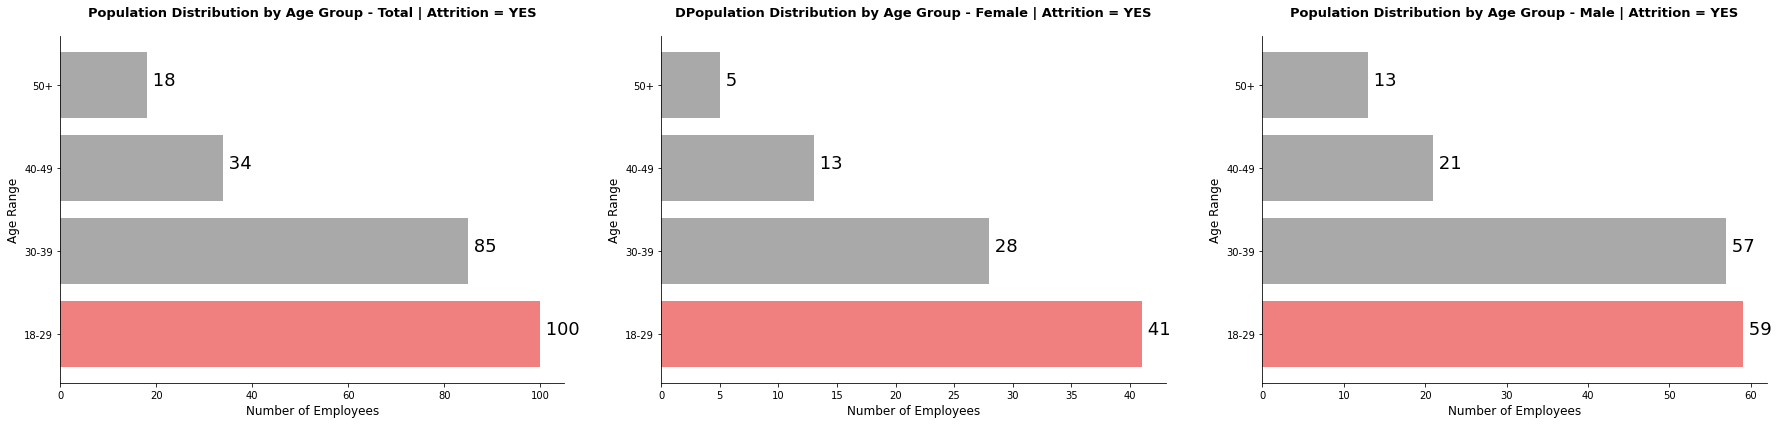

In [45]:
fig, (ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

x4 = ['18-29','30-39','40-49','50+']
z4 = df_yes_2['Total']
ax4.set_title('Population Distribution by Age Group - Total | Attrition = YES', fontsize=13, fontweight='bold',pad=20)
ax4.set_xlabel('Number of Employees', fontsize=12)
ax4.set_ylabel('Age Range', fontsize=12)
clrs = ['darkgray' if (x < max(z4)) else 'lightcoral' for x in z4 ]
ax4.barh(x4, z4, color=clrs)
for i, v in enumerate(z4):
    ax4.text(v, i, " "+str(v), color='black', fontsize = 18)

x5 = ['18-29','30-39','40-49','50+']
z5 = df_yes_2['Female']
ax5.set_title('DPopulation Distribution by Age Group - Female | Attrition = YES', fontsize=13, fontweight='bold',pad=20)
ax5.set_xlabel('Number of Employees', fontsize=12)
ax5.set_ylabel('Age Range', fontsize=12)
clrs = ['darkgray' if (x < max(z5)) else 'lightcoral' for x in z5 ]
ax5.barh(x5, z5, color=clrs)
for i, v in enumerate(z5):
    ax5.text(v, i, " "+str(v), color='black', fontsize = 18)

x6 = ['18-29','30-39','40-49','50+']
z6 = df_yes_2['Male']
ax6.set_title('Population Distribution by Age Group - Male | Attrition = YES', fontsize=13, fontweight='bold',pad=20)
ax6.set_xlabel('Number of Employees', fontsize=12)
ax6.set_ylabel('Age Range', fontsize=12)
clrs = ['darkgray' if (x < max(z6)) else 'lightcoral' for x in z6 ]
ax6.barh(x6, z6, color=clrs)
for i, v in enumerate(z6):
    ax6.text(v, i, " "+str(v), color='black', fontsize = 18)

sns.despine(fig)
plt.tight_layout()
plt.show()

Through the graphs below, we continue our exploration of information and add that:

* 43% up to 30 years
* 56% in the Research & Development Department
* 26% as Laboratory Technician


Can we look at the graphs below and already conclude something without first also assessing the proportion of this population in total?

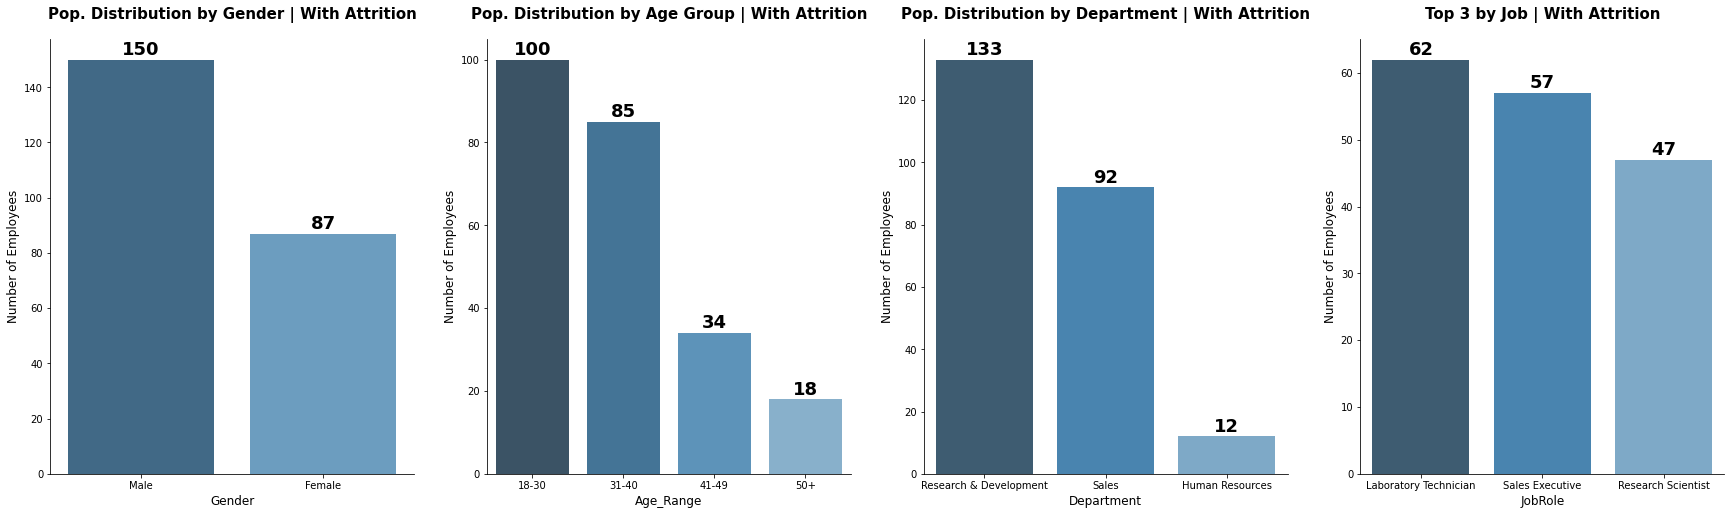

In [46]:
# plotar gráfico de gêneros
f, axes = plt.subplots(1, 4,figsize=(30, 8))

ax1 = sns.countplot(x="Gender", palette="Blues_d", data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['Gender'].value_counts().index,ax=axes[0])
ax1.set_title('Pop. Distribution by Gender | With Attrition', fontsize=15, fontweight='bold',pad=20)
ax1.set_xlabel('Gender', fontsize=12)
ax1.set_ylabel('Number of Employees', fontsize=12)
for p in ax1.patches:
  ax1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', textcoords = 'offset points', xytext = (0, 10), fontsize=18,fontweight='bold')

ax2 = sns.countplot(x="Age_Range", palette="Blues_d",data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['Age_Range'].value_counts().index,ax=axes[1])
ax2.set_title('Pop. Distribution by Age Group | With Attrition', fontsize=15, fontweight='bold',pad=20)
ax2.set_xlabel('Age_Range', fontsize=12)
ax2.set_ylabel('Number of Employees', fontsize=12)
for p in ax2.patches:
  ax2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=18, fontweight='bold')

ax3 = sns.countplot(x="Department", palette="Blues_d",data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['Department'].value_counts().index,ax=axes[2])
ax3.set_title('Pop. Distribution by Department | With Attrition', fontsize=15, fontweight='bold', pad=20)
ax3.set_xlabel('Department', fontsize=12)
ax3.set_ylabel('Number of Employees', fontsize=12)
for p in ax3.patches:
  ax3.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=18, fontweight='bold')

ax4 = sns.countplot(x="JobRole", palette="Blues_d",data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['JobRole'].value_counts()[0:3].index,ax=axes[3])
ax4.set_title('Top 3 by Job | With Attrition', fontsize=15, fontweight='bold',pad=20)
ax4.set_xlabel('JobRole', fontsize=12)
ax4.set_ylabel('Number of Employees', fontsize=12)
for p in ax4.patches:
  ax4.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=18, fontweight='bold')

sns.despine(f)
plt.show()

Analyzing the results of the variables above from the perspective of the proportion of the data, we have:

*  Of the total number of men, 17% have attrition. As for the total number of women, they are 14.7%.
*  25.9% of employees aged 18-30 years have attrition
*  As for the Departments, we have an interesting point, because proportionally the 'problem' is not concentrated in the Research & Development Department that has only 13.8% of employees with attrition, but in Sales Department with 20.6 % of attrition, followed strongly by Human Resources with 19%.
* We can affirm that proportionally, the 3 positions that present more attrition are Sales Representative (39.7%), Laboratory Technician (23.9%) and Human Resources (23%).

In [47]:
print("% by Gender:\n", (df_yes.groupby(by=['Gender'])['EmployeeCount'].sum() / df.groupby(by=['Gender'])['EmployeeCount'].sum()))
print("% by Age Range:\n",(df_yes_2.groupby(by=['Age_Range'])['Total'].sum() / df_pyramid_2.groupby(by=['Age_Range'])['Total'].sum()))
print("% by Department:\n", (df_yes.groupby(by=['Department'])['EmployeeCount'].sum() / df.groupby(by=['Department'])['EmployeeCount'].sum()))
print("% by JobRole:\n",(df_yes.groupby(by=['JobRole'])['EmployeeCount'].sum() / df.groupby(by=['JobRole'])['EmployeeCount'].sum()))

% by Gender:
 Gender
Female    0.147959
Male      0.170068
Name: EmployeeCount, dtype: float64
% by Age Range:
 Age_Range
18-30    0.259067
31-40    0.137318
41-49    0.105590
50+      0.125874
Name: Total, dtype: float64
% by Department:
 Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: EmployeeCount, dtype: float64
% by JobRole:
 JobRole
Healthcare Representative    0.068702
Human Resources              0.230769
Laboratory Technician        0.239382
Manager                      0.049020
Manufacturing Director       0.068966
Research Director            0.025000
Research Scientist           0.160959
Sales Executive              0.174847
Sales Representative         0.397590
Name: EmployeeCount, dtype: float64


Continuing our exploratory journey, we can also observe that attrition occurs with employees with up to 5 years of business, being 31.6% only in up to 12 months only, still with little time with the same manager.

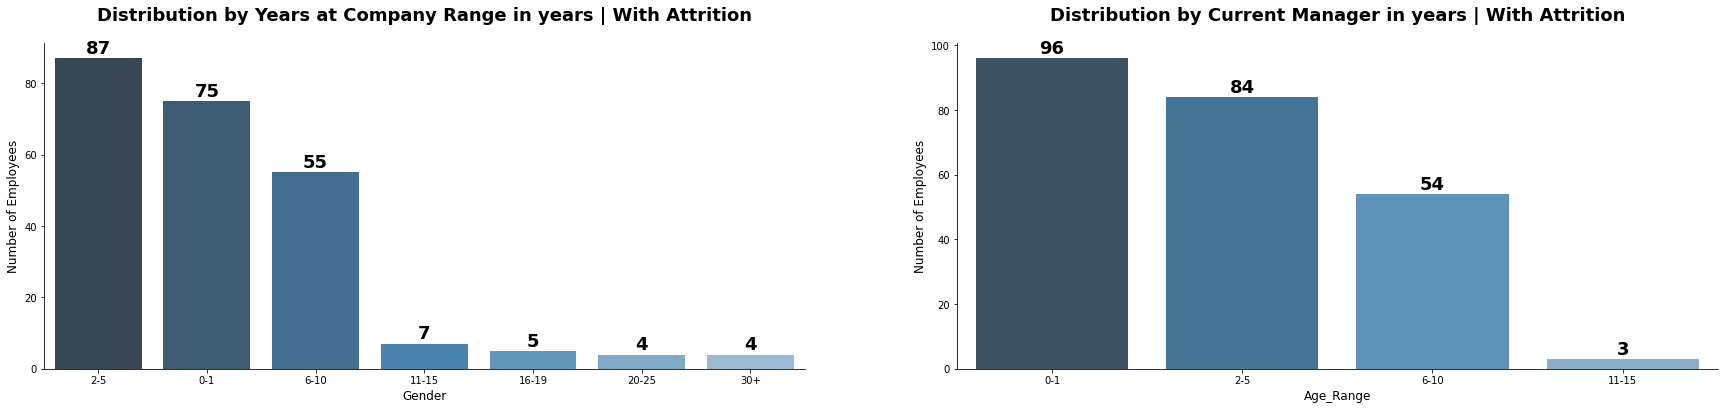

In [48]:
f, axes = plt.subplots(1, 2,figsize=(30, 6))

ax1 = sns.countplot(x="YearsAtCompany_Range", palette="Blues_d", data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['YearsAtCompany_Range'].value_counts().index,ax=axes[0])
ax1.set_title('Distribution by Years at Company Range in years | With Attrition', fontsize=18, fontweight='bold',pad=22)
ax1.set_xlabel('Gender', fontsize=12)
ax1.set_ylabel('Number of Employees', fontsize=12)
for p in ax1.patches:
  ax1.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', textcoords = 'offset points', xytext = (0, 10), fontsize=18,fontweight='bold')

ax2 = sns.countplot(x="YearsWithCurrManager_Range", palette="Blues_d",data=df_yes[df_yes['EmployeeCount'] == 1], order=df_yes['YearsWithCurrManager_Range'].value_counts().index,ax=axes[1])
ax2.set_title('Distribution by Current Manager in years | With Attrition', fontsize=18, fontweight='bold',pad=22)
ax2.set_xlabel('Age_Range', fontsize=12)
ax2.set_ylabel('Number of Employees', fontsize=12)
for p in ax2.patches:
  ax2.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=18, fontweight='bold')


sns.despine(f)
plt.show()

Below, we can apply an analysis of the data using an exploration of the distribution of variables for the two possibilities of our classification problem. It is a good visualization because the class that has more amplitude is where the probabilistic density is higher.

Continuing our diagnosis of the panorama in this company and analyzing the graphs below the perspective of attrition, we add:
* Population up to 30 years
* Bachelor's degree
* Dissatisfied with the environment but interestingly involved with their work
* Lower salary values
* Little or no experience from previous companies
* With recent promotion history
* Great result between work and life balance.

We are looking for differences in distributions to find key points for predicting attrition among employees. In general, we observe that the distributions are quite similar, with no major discrepancy.

The orange representation is for employees who have attrition and the blue representation for employees who do not have attrition.


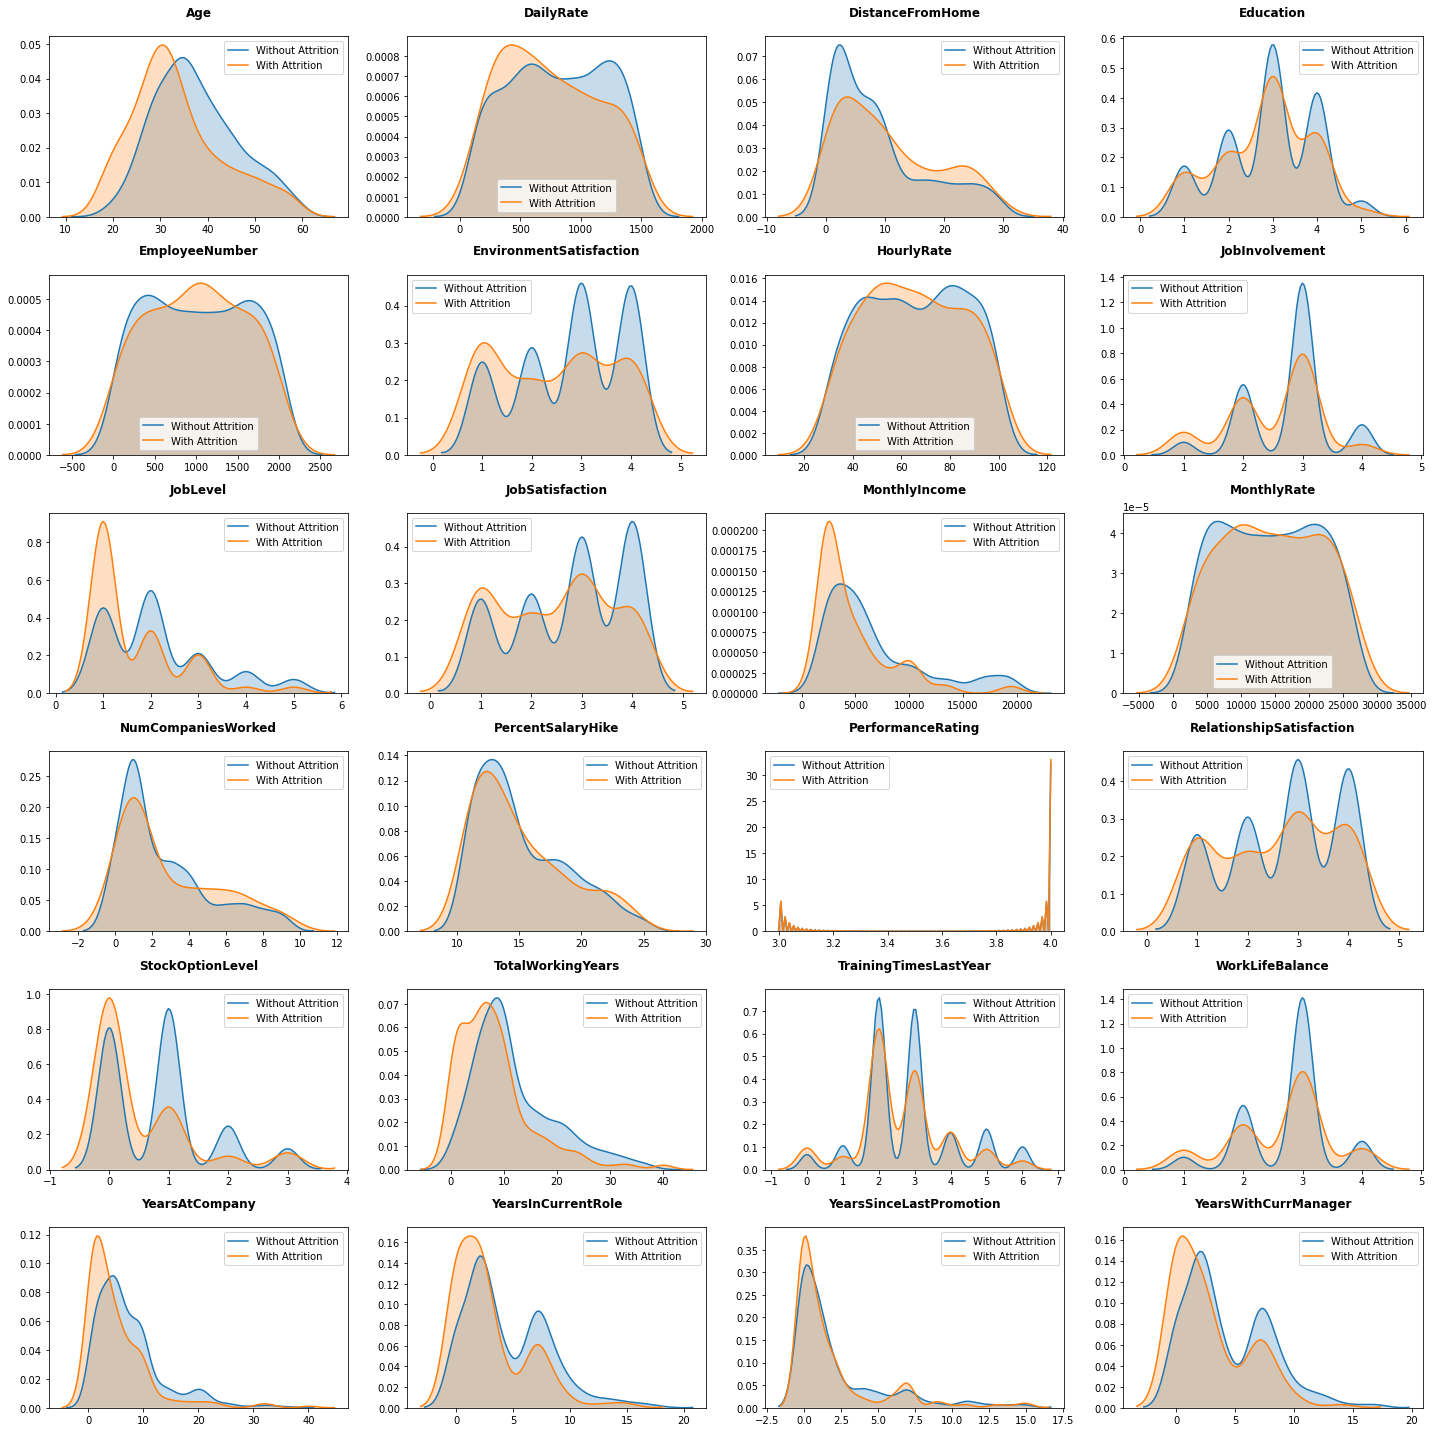

In [49]:
# transforming the target variable
df = pd.read_csv('https://raw.githubusercontent.com/ellenrpaes/Datasets_and_Images/master/datasets_1067_1925_WA_Fn-UseC_-HR-Employee-Attrition.csv')
target_map = {'Yes':1, 'No':0}

# creating the target column
df["Attrition_numerical"] = df["Attrition"].apply(lambda x: target_map[x])

# plotting density graph
colunas = df.drop(['Attrition', 'BusinessTravel', 'Department',
                       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
                       'Over18', 'OverTime','EmployeeCount', 'StandardHours', 'Attrition_numerical'], axis=1).columns
num_plots = len(colunas)
df_class_0 = df[df.Attrition_numerical == 0]
df_class_1 = df[df.Attrition_numerical == 1]

fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in colunas:
    idx += 1
    plt.subplot(6, 4, idx)
    sns.kdeplot(df_class_0[col], label="Without Attrition", shade=True)
    sns.kdeplot(df_class_1[col], label="With Attrition", shade=True)
    plt.title(col, fontsize=12,fontweight='bold',pad=20)
plt.tight_layout()
plt.savefig('density.png')

# Class Balancing

The `Attrition()` variable indicates if the employee has attrition in the work environment. We will use it as a target variable of our Machine Learning model, as it would be the most striking category of the reason for the professional to leave the company in this case.

As shown below, only 237 (16%) of the data are classified with attrition, which indicates that there are imbalance classes and the necessity to carry out a balancing technique.

0    1233
1     237
Name: Attrition_numerical, dtype: int64

Attritions represents 16.12% of Dataset.



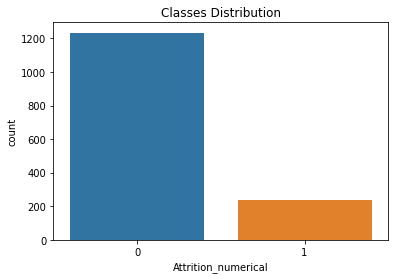

In [50]:
# checking the distribution of the target variable
print(df.Attrition_numerical.value_counts())
print("\nAttritions represents {:.2f}% of Dataset.\n".format((df[df.Attrition_numerical == 1].shape[0] / df.shape[0]) * 100))

# plotting bar chart
fig, ax = plt.subplots()
sns.countplot('Attrition_numerical', data=df, ax=ax)
ax.set_title('Classes Distribution')
plt.show()

## Preparing the data for Machine Learning

To insert our data into a Machine Learning model, we need to work on it. When pre-processing the data, we will go through two steps:

* Transformation of categorical variables: We will use the Label Encoder, which transforms Strings into numbers representing categories.
* Transformation of numeric variables: We will use MinMaxScaler. Simply put, it puts the numbers of entries on a scale of 0 to 1. This process also helps us with Outliers, the reason we had not dealt with them before.

In [51]:
# checking the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [52]:
# creating copy of dataset
df_minmax = df.copy()

# removing unnecessary columns
df_minmax.drop(['Attrition', 'Over18','EmployeeNumber','EmployeeCount','StandardHours'], axis=1, inplace=True)
df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


#### Categorical variables transformation

In [53]:
# instantiating the encoder
le = LabelEncoder()

# encoding numerical variables
df_minmax['BusinessTravel'] = le.fit_transform(df_minmax['BusinessTravel'])
df_minmax['Department'] = le.fit_transform(df_minmax['Department'])
df_minmax['EducationField'] = le.fit_transform(df_minmax['EducationField'])
df_minmax['Gender'] = le.fit_transform(df_minmax['Gender'])
df_minmax['JobRole'] = le.fit_transform(df_minmax['JobRole'])
df_minmax['MaritalStatus'] = le.fit_transform(df_minmax['MaritalStatus'])
df_minmax['OverTime'] = le.fit_transform(df_minmax['OverTime'])

# checkins results
df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0


#### Numerical variables transformation

In [54]:
# MinMaxScaler
scaler = MinMaxScaler()
df_minmax[['Age']] = scaler.fit_transform(df_minmax[['Age']])
df_minmax[['DailyRate']] = scaler.fit_transform(df_minmax[['DailyRate']])
df_minmax[['HourlyRate']] = scaler.fit_transform(df_minmax[['HourlyRate']])
df_minmax[['MonthlyIncome']] = scaler.fit_transform(df_minmax[['MonthlyIncome']])
df_minmax[['MonthlyRate']] = scaler.fit_transform(df_minmax[['MonthlyRate']])
df_minmax[['NumCompaniesWorked']] = scaler.fit_transform(df_minmax[['NumCompaniesWorked']])
df_minmax[['PercentSalaryHike']] = scaler.fit_transform(df_minmax[['PercentSalaryHike']])
df_minmax[['TotalWorkingYears']] = scaler.fit_transform(df_minmax[['TotalWorkingYears']])
df_minmax[['TrainingTimesLastYear']] = scaler.fit_transform(df_minmax[['TrainingTimesLastYear']])
df_minmax[['YearsAtCompany']] = scaler.fit_transform(df_minmax[['YearsAtCompany']])
df_minmax[['YearsInCurrentRole']] = scaler.fit_transform(df_minmax[['YearsInCurrentRole']])
df_minmax[['YearsSinceLastPromotion']] = scaler.fit_transform(df_minmax[['YearsSinceLastPromotion']])
df_minmax[['YearsWithCurrManager']] = scaler.fit_transform(df_minmax[['YearsWithCurrManager']])

# checkins results
df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,0.547619,2,0.715820,2,1,2,1,2,0,0.914286,3,2,7,4,2,0.262454,0.698053,0.888889,1,0.000000,3,1,0,0.200,0.0,1,0.15,0.222222,0.000000,0.294118,1
1,0.738095,1,0.126700,1,8,1,1,3,1,0.442857,2,2,6,2,1,0.217009,0.916001,0.111111,0,0.857143,4,4,1,0.250,0.5,3,0.25,0.388889,0.066667,0.411765,0
2,0.452381,2,0.909807,1,2,2,4,4,1,0.885714,2,1,2,3,2,0.056925,0.012126,0.666667,1,0.285714,3,2,0,0.175,0.5,3,0.00,0.000000,0.000000,0.000000,1
3,0.357143,1,0.923407,1,3,4,1,4,0,0.371429,3,1,6,3,1,0.100053,0.845814,0.111111,1,0.000000,3,3,0,0.200,0.5,3,0.20,0.388889,0.200000,0.000000,0
4,0.214286,2,0.350036,1,2,1,3,1,1,0.142857,3,1,2,2,1,0.129489,0.583738,1.000000,0,0.071429,3,4,1,0.150,0.5,3,0.05,0.111111,0.133333,0.117647,0


### Splitting the dataset in Training and Testing
For us to make predictions, we need to separate our data set between training and testing

In [55]:
# Splitting dataset in train and test
X = df_minmax.drop(['Attrition_numerical'], axis=1)
y = df['Attrition_numerical']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

### Balancing the data

Previously we saw that most of the employees had no attrition which means that our dataset is unbalanced and needs to be treated to improve the performance of our model.

For this, we will use `RandomUnderSampler`, to preserve the minority class (Attrition).

1    178
0    178
dtype: int64


Text(0.5, 1.0, 'Classes Distribution')

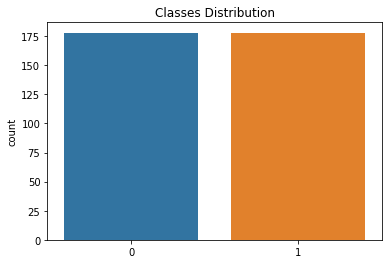

In [56]:
# Applying UnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# checking the balance of classes
print(pd.Series(y_rus).value_counts())

# plotting the new Classes Distribution
sns_plot = sns.countplot(y_rus);
plt.title("Classes Distribution")
#plt.savefig("balanced.png")

## Machine Learning

After we have better understood our data, the reality of the company, and prepared our data, it is time to use Machine Learning to make predictions that can help us in preventing attrition/conflicts in the company, and, consequently, reducing Turnover.
For this, we will use two different models of Machine Learning:
·        Logistic Regression
·        Random Forest
·        SVM - Support Vector Machine

To better understand the evaluation metrics of a Machine Learning model, the following on [here](https://medium.com/data-hackers/como-avaliar-seu-modelo-de-classifica%C3%A7%C3%A3o-34e6f6011108) an article by Data Scientist and Sigmoidal student, Marcelo Randolfo, published in Data Hackers, where he explains in detail how to evaluate a classification model, like this one.

### Baseline With Unbalanced Data

As we are working on a project without a previous context of metrics already used by the company, we need to create a baseline, a minimum acceptable result, that serves as a reference for our improvement.

In this case, we will use the Logistic Regression model, with our data unbalanced. It is important to assess the real necessity to balance our data and get references.

In [57]:
# creating a copy of the unbalanced data
df_desbalanceado = df_minmax.copy()

# separating the variables between X and y
desb_X = df_desbalanceado.drop(['Attrition_numerical',"Age",'Department','JobLevel','JobRole','MaritalStatus','MonthlyIncome',
                   'PercentSalaryHike', 'PerformanceRating','StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
                   'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)
desb_y = df_desbalanceado['Attrition_numerical']

# splitting the dataset in train and test
desb_X_train, desb_X_test, desb_y_train, desb_y_test = train_test_split(desb_X, desb_y, stratify=y, shuffle=True)

In [58]:
# LogisticRegression - instantiate and training the model
np.random.seed(2)
desb_model = LogisticRegression()
desb_model.fit(desb_X_train, desb_y_train)


results = cross_val_score(desb_model, desb_X_train, 
                          desb_y_train, cv = 5, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Accuracy Average: {:.2f}%'.format(mean*100))
    print('Interval of Accuracy: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(results)

Accuracy Average: 85.03%
Interval of Accuracy: [83.16% ~ 86.90%]


Classification Report:
               precision    recall  f1-score   support

           0     0.8559    0.9806    0.9140       309
           1     0.5714    0.1356    0.2192        59

    accuracy                         0.8451       368
   macro avg     0.7137    0.5581    0.5666       368
weighted avg     0.8103    0.8451    0.8026       368

Accuracy: 0.8451



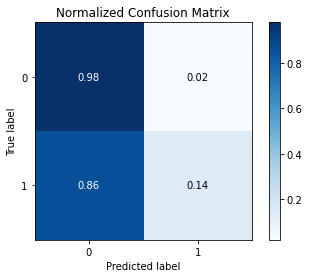

In [59]:
# making predictions
desb_y_pred = desb_model.predict(desb_X_test)
desb_y_proba = desb_model.predict_proba(desb_X_test)

# plotting the confusion matrix
skplt.metrics.plot_confusion_matrix(desb_y_test, desb_y_pred, normalize=True)

# printing the Classification Report
print("Classification Report:\n", classification_report(desb_y_test, desb_y_pred, digits=4))

# Printing Accuracy
print("Accuracy: {:.4f}\n".format(accuracy_score(desb_y_test, desb_y_pred)))


### Conclusions

When analyzing the Confusion Matrix, we can see that we had many False Negatives, which is a problem.

* Although the model has an accuracy of around 87%, we cannot take this metric into account.
* We have a high number of False Negatives, which is a problem.


### Balanced Data

Now that we have our baseline and a goal to achieve, it is time to work with our carefully crafted data and seek our best.

In [60]:
# LogisticRegression - instantiate and training the model
np.random.seed(2)
model = LogisticRegression()
results = cross_val_score(model, X_rus, 
                          y_rus, cv = 10, scoring = 'accuracy')
intervalo(results)

model.fit(X_rus, y_rus)


Accuracy Average: 70.52%
Interval of Accuracy: [54.50% ~ 86.55%]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Classification Report:
               precision    recall  f1-score   support

           0     0.9306    0.7379    0.8231       309
           1     0.3415    0.7119    0.4615        59

    accuracy                         0.7337       368
   macro avg     0.6360    0.7249    0.6423       368
weighted avg     0.8362    0.7337    0.7651       368

Accuracy: 0.7337



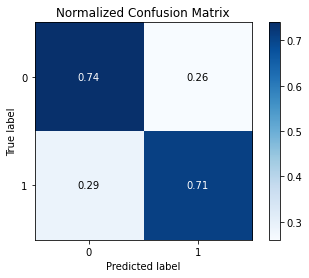

In [61]:
# making predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# plotting the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# printing the Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# Printing Accuracy
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, y_pred)))


### Conclusions - Logistic Regression

Here we can see that with balanced data, our results were better.
* Although we reduced the number of False Negatives, we increased the amount of False Positive. It is good, as it is better to take care of an employee who may not be attrition than to let one go that will have attrition.
* We have 0.8 True Positives
* Another interesting metric is the result of the Recall of 0.7966 for class 1 as it shows the frequency of those who were classified as belonging to a class and who are really from that class.

### Random Forest

We will test other Machine Learning algorithms. In this case, we will use the Random Forest. As the name suggests, it is based on decision tree models. The difference is that it creates many decision trees at random. 

In [62]:
# creating and training the model
seed = 0
rf = RandomForestClassifier(n_jobs = -1,
                            n_estimators= 1000,
                            max_features= 0.3,
                            max_depth= 3,
                            min_samples_leaf= 3,
                            random_state= seed, verbose= 0, oob_score = 5)

# cross validation Random Forest Classifier
results = cross_val_score(rf, X_rus, 
                          y_rus, cv = 5, scoring = 'accuracy')
intervalo(results)

Accuracy Average: 68.82%
Interval of Accuracy: [65.04% ~ 72.60%]


Classification Report:
               precision    recall  f1-score   support

           0     0.9186    0.7670    0.8360       309
           1     0.3455    0.6441    0.4497        59

    accuracy                         0.7473       368
   macro avg     0.6320    0.7055    0.6428       368
weighted avg     0.8267    0.7473    0.7740       368

Accuracy:	 0.7473



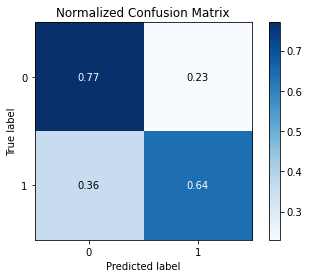

In [63]:
# making predictions
rf.fit(X_rus, y_rus)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred, digits=4))

# Accuracy
print('Accuracy:\t {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

# confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

### Most Important Variables
Another interesting check that we can do is about the features (variables) most important for the result of the model.

In [64]:
# calculating importance of features | Random Forest
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

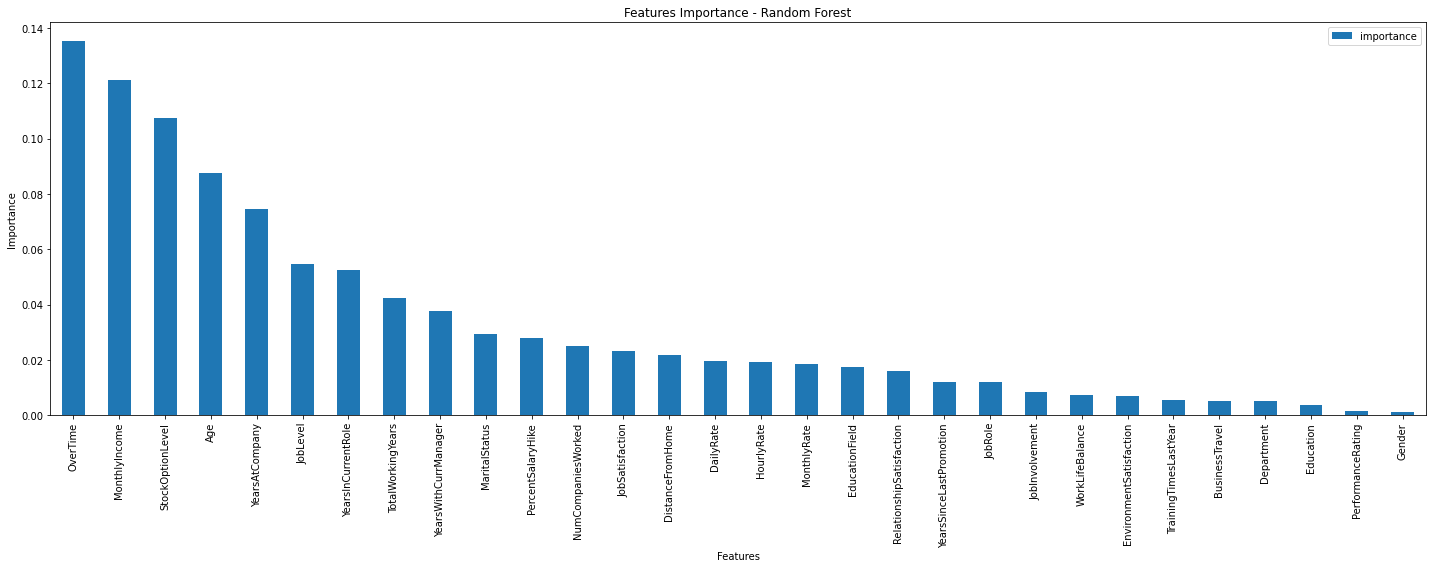

In [65]:
# plot the bar graph for most important variables
fig, ax = plt.subplots(figsize=(20,8))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Features Importance - Random Forest")
ax.set_xlabel("Features")
ax.set_ylabel("Importance")

plt.savefig("feat_imp.png")
plt.tight_layout()

### Conclusões - Random Forest

Among the main variables, we can highlight:

* Monthly Salary (MonthlyIncome)
* Overtime (OverTime)
* Job Level (JobLevel)
* Years Working (TotalWorkingYears)
* Age
* Years with the Current Manager (YearsWithCurrentManager)

Following the balanced data, we observe:

* A drop in performance when compared to the Logistic Regression model, with 0.69 True Positives
* Recall also declined, with 0.6949 for class 1 (True Positive).



### SVM

In [66]:
from sklearn.svm import SVC

In [67]:
model = SVC()
results = cross_val_score(model, X_rus, 
                          y_rus, cv = 10, scoring = 'accuracy')
intervalo(results)
model.fit(X_rus, y_rus)

Accuracy Average: 62.33%
Interval of Accuracy: [44.72% ~ 79.93%]


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Classification Report:
               precision    recall  f1-score   support

           0     0.9029    0.6019    0.7223       309
           1     0.2407    0.6610    0.3529        59

    accuracy                         0.6114       368
   macro avg     0.5718    0.6315    0.5376       368
weighted avg     0.7967    0.6114    0.6631       368

Accuracy: 0.6114



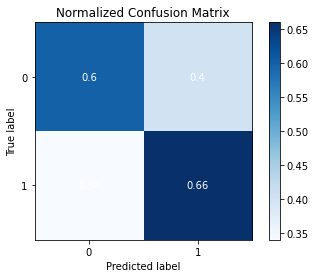

In [68]:
# making predictions
y_pred = model.predict(X_test)

# Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

# Accuracy
print("Accuracy: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

### Conclusions - SVM

Following the balanced data, we observe:
* Performance very similar to the Logistic Regression model

# Conclusions

The Logistic Regression model performed better, after adjusting the hyperparameter of cross-validation from 5 to 10. And the metric chosen to be the beacon for choosing was Recall because we selected to have a performance aimed at identifying among all the Positive class situations as expected value, how many are correct.

However, the features importances of Random Forest model are very valuable, because can give us insights into the most critical points to act preventively. Among the main variables, we can highlight:

* Monthly Salary (MonthlyIncome)
* Overtime (OverTime)
* Job Level (JobLevel)
* Years Working (TotalWorkingYears)
* Age
* Years with the Current Manager (YearsWithCurrentManager)

We can identify variables closely related to career, benefits and workload. High levels of stress? Feeling of devaluation? These are hypotheses. Only a more detailed analysis can tell us.

With access to more data, a better understanding of the organizational context of the company and its policies, this work can be better directed to solve the real pain of this business.

# Possible Improvements / Opportunities

* Improve data pre-processing
* Apply Feature Engineering
* Test Different Classification Models
* Move forward with Parameter Tuning
